In [75]:
# coding=utf-8
%matplotlib inline
import requests
import pandas as pd
import math
import datetime
from collections import Counter
import json
import pprint
import warnings
from matplotlib import pyplot as plt

# load data from prepared data set news techcrunch.com
DATA_URL = 'https://raw.githubusercontent.com/andriipetruk/techcrunch_dataset/master/news.json'
df = pd.read_json(DATA_URL)


df.head()


,author,tag,time,title
0,Lora Kolodny,None,2017-01-21 03:31:03,Whitehouse.gov petition seeking Trump tax retu...
1,Brian Heater,Hardware,2017-01-21 03:06:59,Qualcomm fires back against Apple over lawsuit...
2,Cyrus Radfar,None,2017-01-18 05:30:22,Tyrant in the code
3,Elias Constantopedos,Virtual Reality,2017-01-21 03:00:26,"For dramatic VR to succeed, music must become ..."
4,Emily Calandrelli,Science,2017-01-18 05:15:45,2016 is the new hottest year on record – how N...


In [76]:
df.dtypes

author    object
tag       object
time      object
title     object
dtype: object

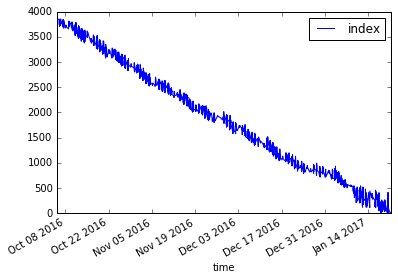

In [77]:
df['index']=df.index
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index(['time'])
df.plot()